https://www.kaggle.com/competitions/reconocimiento-de-expresiones-faciales

In [24]:
import numpy as np
import pandas as pd
import os
import cv2
from skimage.io import imread
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def read_data(directorio):
    pixel = [] 
    expression = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))

                pixel.append(image)
                expression.append(folder)

    return np.array(pixel),np.array(expression)

In [3]:
def read_data_test(directorio):
    pixel = [] 
    for folder in os.listdir(directorio):
        #print(folder)
        #if os.path.isdir('/'.join([directorio, folder])):
        #for file in os.listdir('/'.join([directorio, folder])):

        image = imread('/'.join([directorio, folder]))

        pixel.append(image)


    return np.array(pixel)

In [4]:
X_train_array, y_train_array = read_data('./data/train')

angry
disgust
fear
happy
neutral
sad
surprise


In [5]:
dict_emotions = {
    'angry':0,
    'disgust':1,
    'fear':2,
    'happy':3,
    'neutral':4,
    'sad':5,
    'surprise':6
}

In [6]:
true_test = read_data_test('./data/test')

In [7]:
print(X_train_array.shape)
print(y_train_array.shape)
print(true_test.shape)

(28821, 48, 48)
(28821,)
(7066, 48, 48)


In [8]:
# Barajo las dos arrays en el mismo orden:

indices = np.random.permutation(X_train_array.shape[0])
X_train_shuffled = X_train_array[indices]
y_train_shuffled = y_train_array[indices]

In [9]:
print(X_train_shuffled.shape)
print(y_train_shuffled.shape)

(28821, 48, 48)
(28821,)


In [10]:
X_test = X_train_shuffled[:5764]
X_train = X_train_shuffled[5765:]
y_test = y_train_shuffled[:5764]
y_train = y_train_shuffled[5765:]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23056, 48, 48)
(23056,)
(5764, 48, 48)
(5764,)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # 7 Expresiones :)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\annav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,895 (1.18 MB)

 Trainable params: 309,895 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
################# MODIFICACIONES ###########################

In [13]:
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

In [14]:
# Normalizamos imagenes
train_images /= 255
test_images /= 255

In [ ]:
##########################################################

In [15]:
y_train

array(['happy', 'happy', 'neutral', ..., 'happy', 'surprise', 'sad'],
      dtype='<U8')

In [16]:
y_train_mapped = np.array([dict_emotions[emotion] for emotion in y_train])

In [17]:
y_train_mapped

array([3, 3, 4, ..., 3, 6, 5])

In [19]:
y_test_mapped = np.array([dict_emotions[emotion] for emotion in y_test])

In [18]:
batch_size = 32
epochs = 50
validation_split = 0.2

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)


In [20]:
history = model.fit(train_images, y_train_mapped,  
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2416 - loss: 1.8286 - val_accuracy: 0.2585 - val_loss: 1.7592 - learning_rate: 0.0010
Epoch 2/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.3108 - loss: 1.6804 - val_accuracy: 0.4163 - val_loss: 1.4952 - learning_rate: 0.0010
Epoch 3/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.4506 - loss: 1.4238 - val_accuracy: 0.4419 - val_loss: 1.4387 - learning_rate: 0.0010
Epoch 4/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.4961 - loss: 1.2954 - val_accuracy: 0.4866 - val_loss: 1.3128 - learning_rate: 0.0010
Epoch 5/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.5443 - loss: 1.1993 - val_accuracy: 0.5085 - val_loss: 1.2863 - learning_rate: 0.0010
Epoch 6/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.5724 - loss: 1.1270 - val_accuracy: 0.5169 - val_loss: 1.2697 - learning_rate: 0.0010
Epoch 7/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.5946 - l

In [21]:
model.evaluate(test_images,y_test_mapped)

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5342 - loss: 1.2431


[1.2234314680099487, 0.5414642691612244]

In [22]:
predictions = model.predict(test_images)

181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [23]:
predicted_classes = np.argmax(predictions, axis=1)

In [26]:
print(classification_report(y_test_mapped, predicted_classes, target_names=dict_emotions.keys()))

              precision    recall  f1-score   support

       angry       0.42      0.46      0.44       768
     disgust       1.00      0.01      0.03        76
        fear       0.36      0.23      0.28       771
       happy       0.75      0.78      0.76      1414
     neutral       0.51      0.53      0.52      1070
         sad       0.40      0.44      0.42      1024
    surprise       0.65      0.72      0.69       641

    accuracy                           0.54      5764
   macro avg       0.58      0.45      0.45      5764
weighted avg       0.54      0.54      0.53      5764



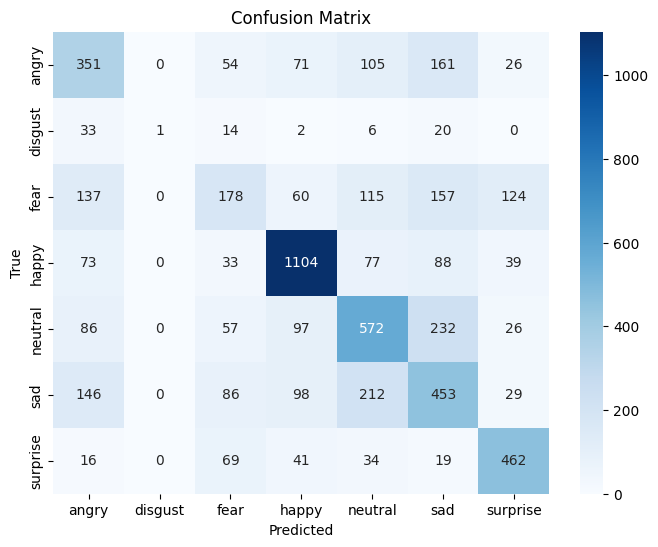

In [28]:
cm = confusion_matrix(y_test_mapped, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dict_emotions.keys(), yticklabels=dict_emotions.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()